In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")

In [3]:
data.shape

(1338, 7)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

no null values present

In [7]:
cat_data = data.select_dtypes('object').columns.tolist()

In [8]:
cont_data = data.select_dtypes(['int64','float64']).columns.tolist()

In [9]:
cat_data

['sex', 'smoker', 'region']

In [10]:
cont_data

['age', 'bmi', 'children', 'charges']

dividing data into different list according to nature of data present

In [11]:
cont_data = cont_data[:2]

In [12]:
cont_data

['age', 'bmi']

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
for i in data[cat_data]:
    print(f"{i}\n{data[cat_data][i].value_counts()}")

sex
male      676
female    662
Name: sex, dtype: int64
smoker
no     1064
yes     274
Name: smoker, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Detalied info about categorical features

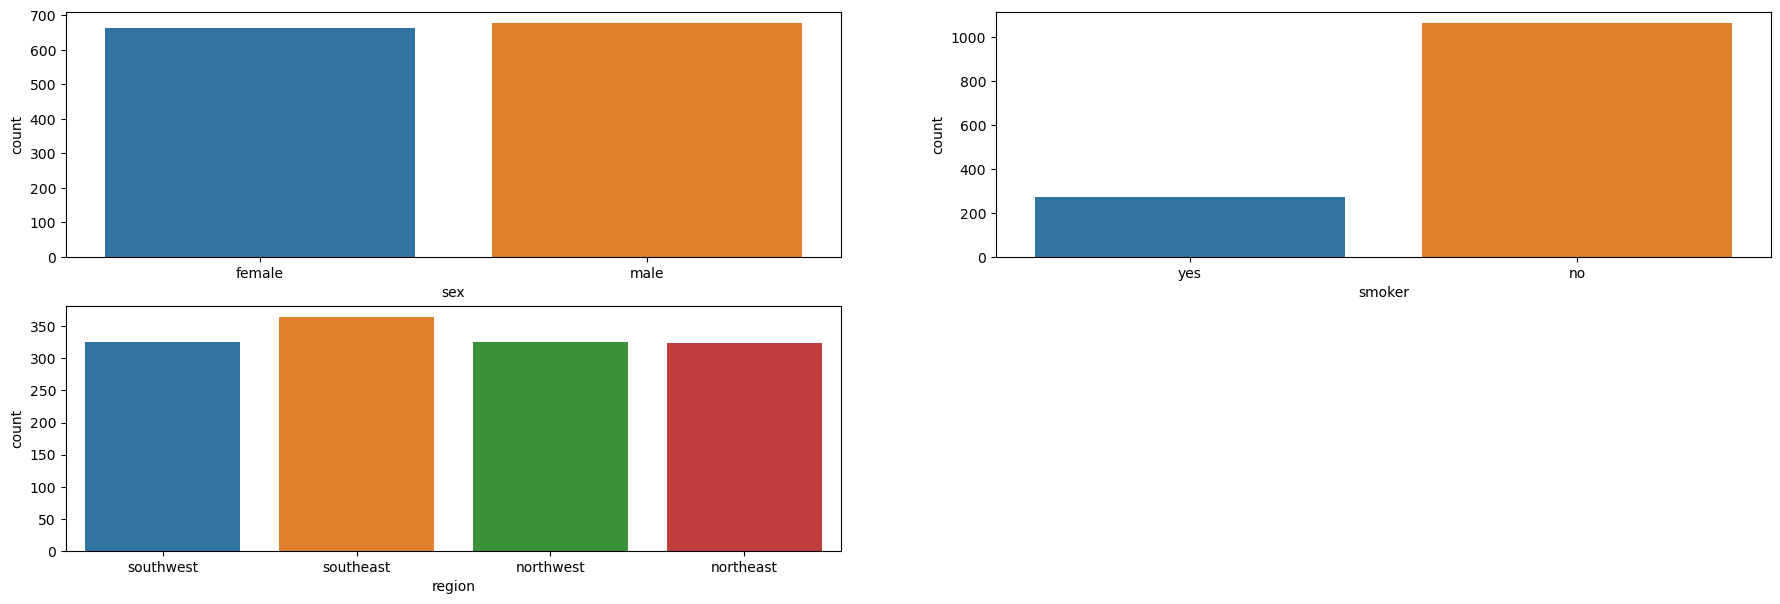

In [15]:
plt.figure(figsize=(22,7))

plotnumber=1

for i in data[cat_data]:
    if plotnumber <=3:
        plt.subplot(2,2,plotnumber)
        sns.countplot(x=data[cat_data][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

<Axes: xlabel='children', ylabel='count'>

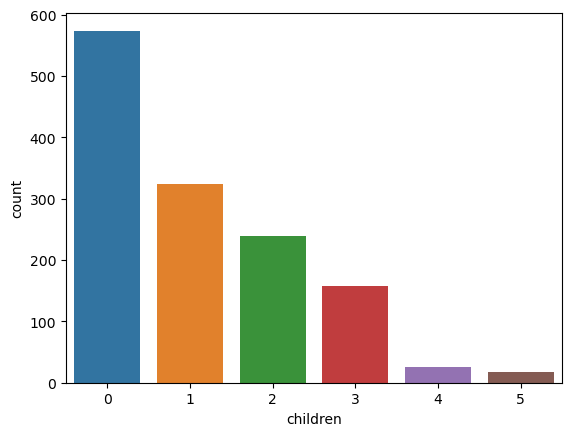

In [16]:
sns.countplot(x=data['children'])

In [17]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

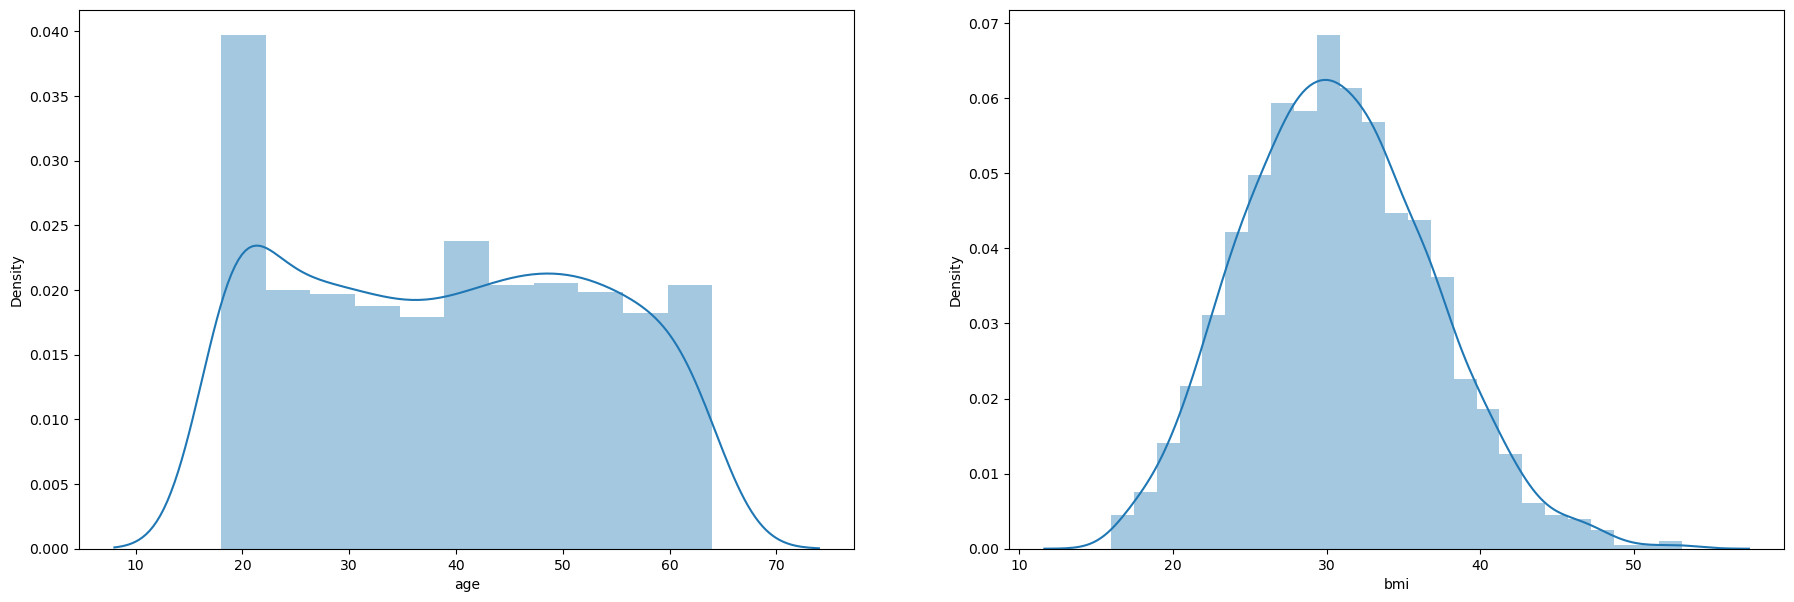

In [18]:
plt.figure(figsize=(22,7))

plotnumber=1

for i in data[cont_data]:
    if plotnumber <=2:
        plt.subplot(1,2,plotnumber)
        sns.distplot(data[cont_data][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

distribution of labels with contionous data

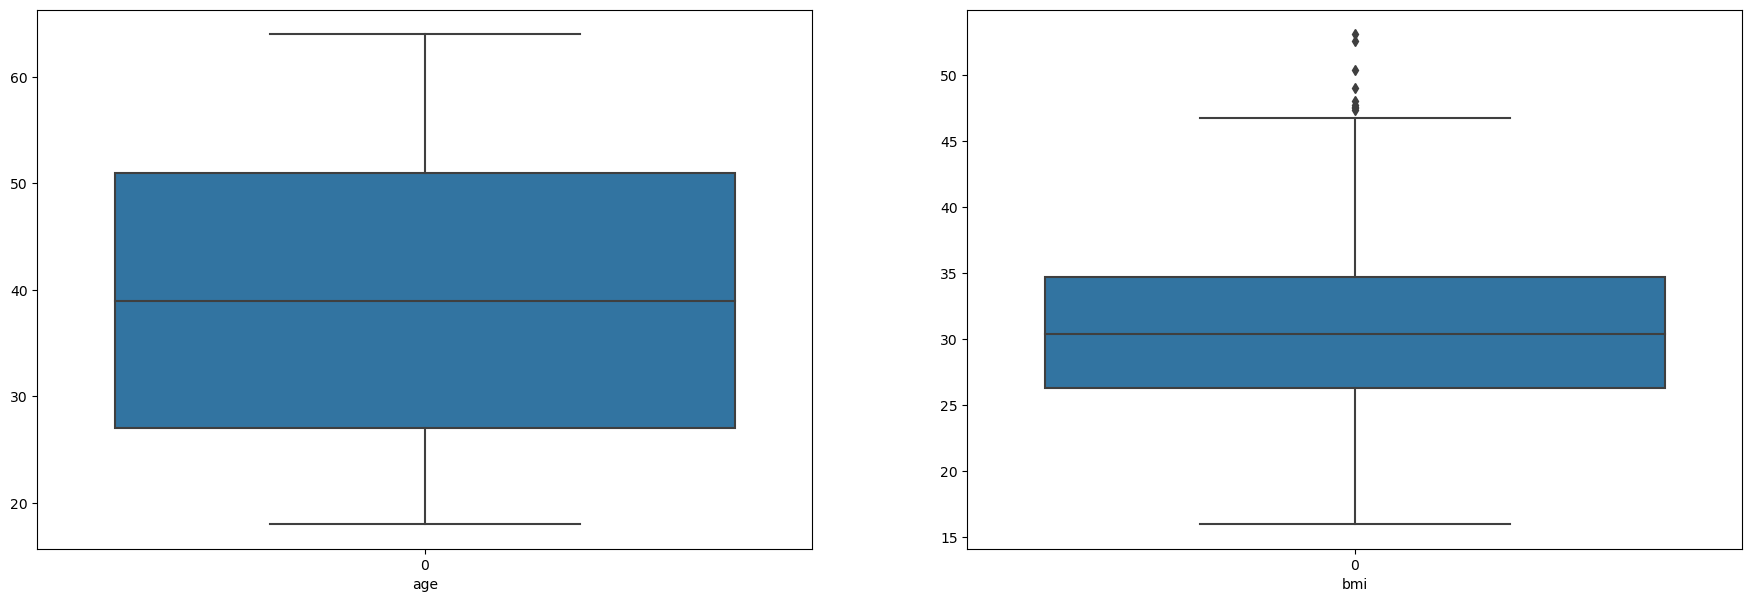

In [19]:
plt.figure(figsize=(22,7))

plotnumber=1

for i in data[cont_data]:
    if plotnumber <=2:
        plt.subplot(1,2,plotnumber)
        sns.boxplot(data[cont_data][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

bmi has outliers

In [20]:
data.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

bmi and age both have very less realtionship with the target

In [21]:
data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

skewness is under tolerable limit

In [22]:
from scipy.stats import zscore

In [23]:
z = np.abs(zscore(data[cont_data]))

In [24]:
data = data[(z<3).all(axis=1)]

In [25]:
data.shape

(1334, 7)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
mm = MinMaxScaler()

In [28]:
data[cont_data] = mm.fit_transform(data[cont_data])

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.371847,0,yes,southwest,16884.92400
1,0.000000,male,0.554656,1,no,southeast,1725.55230
2,0.217391,male,0.530676,3,no,southeast,4449.46200
3,0.326087,male,0.210059,0,no,northwest,21984.47061
4,0.304348,male,0.402367,0,no,northwest,3866.85520


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
data['sex'] = le.fit_transform(data['sex'])

In [33]:
data['smoker'] = le.fit_transform(data['smoker'])

In [34]:
data['region'] = le.fit_transform(data['region'])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x = data.drop('charges',axis=1)

y = data['charges']

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=88)

# LR

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
pred1 = lr.predict(x_train)

In [42]:
pred2 = lr.predict(x_test)

In [43]:
print(f"Trainning score {r2_score(y_train,pred1)}")

Trainning score 0.7502447831215796


In [44]:
print(f"Test score {r2_score(y_test,pred2)}")

Test score 0.7488780173083247


In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
cv = cross_val_score(lr,x,y)

cv_mean = cv.mean()

cv_mean

0.7470708876548772

# LASSO

In [48]:
from sklearn.linear_model import Lasso

In [49]:
ls = Lasso()

In [50]:
ls.fit(x_train,y_train)

Lasso()

In [51]:
pred1 = ls.predict(x_train)

In [52]:
pred2 = ls.predict(x_test)

In [53]:
print(f"Trainning score {r2_score(y_train,pred1)}")

Trainning score 0.7502444534525503


In [54]:
print(f"Test score {r2_score(y_test,pred2)}")

Test score 0.7488077217448896


In [55]:
cv = cross_val_score(ls,x,y)

cv_mean = cv.mean()

cv_mean

0.7470819460341585

# RIDGE

In [56]:
from sklearn.linear_model import Ridge

In [57]:
ri = Ridge()

In [58]:
ri.fit(x_train,y_train)

Ridge()

In [59]:
pred1 = ri.predict(x_train)

In [60]:
pred2 = ri.predict(x_test)

In [61]:
print(f"Trainning score {r2_score(y_train,pred1)}")

Trainning score 0.7501979026112969


In [62]:
print(f"Test score {r2_score(y_test,pred2)}")

Test score 0.7478687324837998


In [63]:
cv = cross_val_score(ri,x,y)

cv_mean = cv.mean()

cv_mean

0.7470784785031941

In [64]:
from sklearn.model_selection import GridSearchCV

# KNN

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
knn = KNeighborsRegressor()

In [67]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [70]:
pred1 = knn.predict(x_train)

In [71]:
pred2 = knn.predict(x_test)

In [72]:
print(f"Trainning score {r2_score(y_train,pred1)}")

Trainning score 0.7982794995733269


In [73]:
print(f"Test score {r2_score(y_test,pred2)}")

Test score 0.7167151300551111


In [74]:
cv = cross_val_score(ri,x,y)

cv_mean = cv.mean()

cv_mean

0.7470784785031941

# DT

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
dt = DecisionTreeRegressor()

In [77]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [78]:
pred1 = dt.predict(x_train)

In [79]:
pred2 = dt.predict(x_test)

In [80]:
print(f"Trainning score {r2_score(y_train,pred1)}")

Trainning score 0.9982748473093958


In [81]:
print(f"Test score {r2_score(y_test,pred2)}")

Test score 0.7138745830148874


In [82]:
cv = cross_val_score(ri,x,y)

cv_mean = cv.mean()

cv_mean

0.7470784785031941

# RF

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rf = RandomForestRegressor()

In [85]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [87]:
pred1 = rf.predict(x_train)

In [88]:
pred2 = rf.predict(x_test)

In [89]:
print(f"Trainning score {r2_score(y_train,pred1)}")

Trainning score 0.9757814284753186


In [90]:
print(f"Test score {r2_score(y_test,pred2)}")

Test score 0.8211191421972308


In [91]:
cv = cross_val_score(ri,x,y)

cv_mean = cv.mean()

cv_mean

0.7470784785031941

# ADA

In [92]:
from sklearn.ensemble import AdaBoostRegressor

In [93]:
ada = AdaBoostRegressor()

In [94]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [95]:
pred1 = ada.predict(x_train)

In [96]:
pred2 = ada.predict(x_test)

In [97]:
print(f"Trainning score {r2_score(y_train,pred1)}")

Trainning score 0.8064685036509146


In [98]:
print(f"Test score {r2_score(y_test,pred2)}")

Test score 0.7827157583402269


In [99]:
cv = cross_val_score(ri,x,y)

cv_mean = cv.mean()

cv_mean

0.7470784785031941

# GBDT

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

In [102]:
gb = GradientBoostingRegressor()

In [103]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [104]:
pred1 = gb.predict(x_train)

In [105]:
pred2 = gb.predict(x_test)

In [106]:
print(f"Trainning score {r2_score(y_train,pred1)}")

Trainning score 0.909174810613439


In [107]:
print(f"Test score {r2_score(y_test,pred2)}")

Test score 0.8403697031981384


In [108]:
cv = cross_val_score(ri,x,y)

cv_mean = cv.mean()

cv_mean

0.7470784785031941

# XGBOOST

In [109]:
from xgboost import XGBRegressor

In [110]:
xg = XGBRegressor()

In [111]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [112]:
pred1 = xg.predict(x_train)

In [113]:
pred2 = xg.predict(x_test)

In [114]:
print(f"Trainning score {r2_score(y_train,pred1)}")

Trainning score 0.9944619084595244


In [115]:
print(f"Test score {r2_score(y_test,pred2)}")

Test score 0.7959135288131642


In [116]:
cv = cross_val_score(ri,x,y)

cv_mean = cv.mean()

cv_mean

0.7470784785031941

# SVC

In [117]:
from sklearn.svm import SVR

In [118]:
svr = SVR()

In [119]:
svr.fit(x_train,y_train)

SVR()

In [121]:
pred1 = svr.predict(x_train)

In [123]:
pred2 = svr.predict(x_test)

In [124]:
print(f"Trainning score {r2_score(y_train,pred1)}")

Trainning score -0.09809961519159316


In [125]:
print(f"Test score {r2_score(y_test,pred2)}")

Test score -0.1392205216145046


In [126]:
cv = cross_val_score(ri,x,y)

cv_mean = cv.mean()

cv_mean

0.7470784785031941

# LASSO IS THE BEST MODEL SO WE CAN FURTHER TUNE IT

In [128]:
ls = Lasso()

In [129]:
para = {"alpha":[0.01,1,0.1],
       "max_iter":[1000,10000,100],
       "selection":['cyclic', 'random']}

In [130]:
gs = GridSearchCV(ls,para,n_jobs=1)

In [135]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(), n_jobs=1,
             param_grid={'alpha': [0.01, 1, 0.1],
                         'max_iter': [1000, 10000, 100],
                         'selection': ['cyclic', 'random']})

In [137]:
gs.best_params_

{'alpha': 1, 'max_iter': 1000, 'selection': 'cyclic'}

In [138]:
gs.best_estimator_.fit(x_train,y_train)

Lasso(alpha=1)

In [139]:
pred1 = gs.best_estimator_.predict(x_train)

In [140]:
pred2 = gs.best_estimator_.predict(x_test)

In [141]:
print(f"Trainning score {r2_score(y_train,pred1)}")

Trainning score 0.7502444534525503


In [142]:
print(f"Test score {r2_score(y_test,pred2)}")

Test score 0.7488077217448896


In [143]:
cv = cross_val_score(ri,x,y)

cv_mean = cv.mean()

cv_mean

0.7470784785031941

In [146]:
conclusion = pd.DataFrame({"Actual":y_test,"Predicted":pred2})

In [147]:
conclusion

,Actual,Predicted
2,4449.46200,7132.659699
483,9880.06800,13552.479932
808,1131.50660,2120.943396
1088,9748.91060,16802.738603
28,2775.19215,172.722692
...,...,...
912,14382.70905,13228.299031
1144,9630.39700,11524.876575
1260,4544.23480,3257.887023
861,7151.09200,7673.975707
